{'2017': 2039, '2018': 2491, '2019': 548}
{'12': 635, '11': 253, '10': 628, '09': 369, '08': 525, '07': 632, '06': 685, '05': 122, '04': 328, '03': 300, '02': 504, '01': 97}


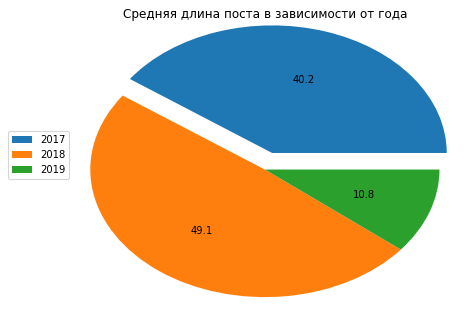

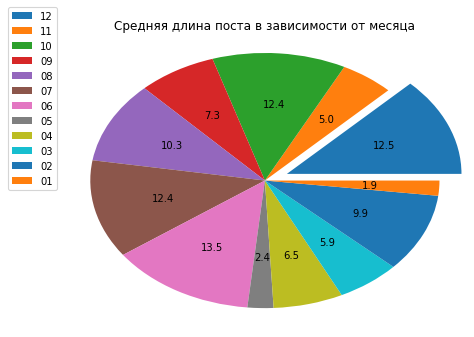

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv
import sqlite3
def graphs_times():
    years = []
    months = [ ]
    lens = [] 
    conn = sqlite3.connect('database.db')
    c = conn.cursor() 
    for x in c.execute('SELECT * FROM posts ORDER BY year'):
        years.append(x[4])
        months.append(x[5])
        lens.append(x[3])


    z = zip(years, lens)
    d_years = {}
    for x,y in z:
        if x in d_years.keys():
            d_years[x] = d_years[x] + y
        else:    
            d_years[x] = y
    print(d_years)
    years_gr = [x for x in d_years.keys()]
    lens_years_gr = [x for x in d_years.values()]

    z = zip(months, lens)
    d_months = {}
    for x,y in z:
        if x in d_months.keys():
            d_months[x] = d_months[x] + y
        else:    
            d_months[x] = y
    print(d_months)
    months_gr = [x for x in d_months.keys()]
    lens_months_gr = [x for x in d_months.values()]



    def graph_time(data_names,data_values,title):
        dpi = 80
        fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
        mpl.rcParams.update({'font.size': 9})

        plt.title(title)

        xs = range(len(data_names))

        plt.pie( 
            data_values, autopct='%.1f', radius = 1.1,
            explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
        plt.legend(
            bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
            loc = 'lower left', labels = data_names )
        fig.savefig('pie.png')
       
        plt.show()
        
    title = 'Средняя длина поста в зависимости от года'
    data_names = years_gr
    data_values = lens_years_gr
    graph_time(data_names,data_values,title)

    title = 'Средняя длина поста в зависимости от месяца'
    data_names = months_gr
    data_values = lens_months_gr
    graph_time(data_names,data_values,title)

graphs_times()